In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
df = pd.read_csv('booking.csv')

In [2]:
df.dtypes 

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [3]:
#Did not know the meaning of P-C and P-not-C from note book.
data= df.pop('P-C')
ds= df.pop('P-not-C')

In [4]:
too_long_values=['lead time', 'date of reservation']

In [5]:
for column in df.columns:
    if column not in too_long_values:
        unique_values = df[column].unique()
        print(f"{column}: {unique_values}")

Booking_ID: ['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']
number of adults: [1 2 3 0 4]
number of children: [ 1  0  2  3 10  9]
number of weekend nights: [2 1 0 4 3 6 5 7]
number of week nights: [ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
type of meal: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
car parking space: [0 1]
room type: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market segment type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
repeated: [0 1]
average price: [ 88.   106.68  50.   ... 118.43 137.25 167.8 ]
special requests: [0 1 3 2 4 5]
booking status: ['Not_Canceled' 'Canceled']


In [6]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,4/11/2018,Canceled


In [7]:
df.shape

(36285, 15)

In [8]:
df.isna().sum().sum() # The dataset has 0 NA values.

0

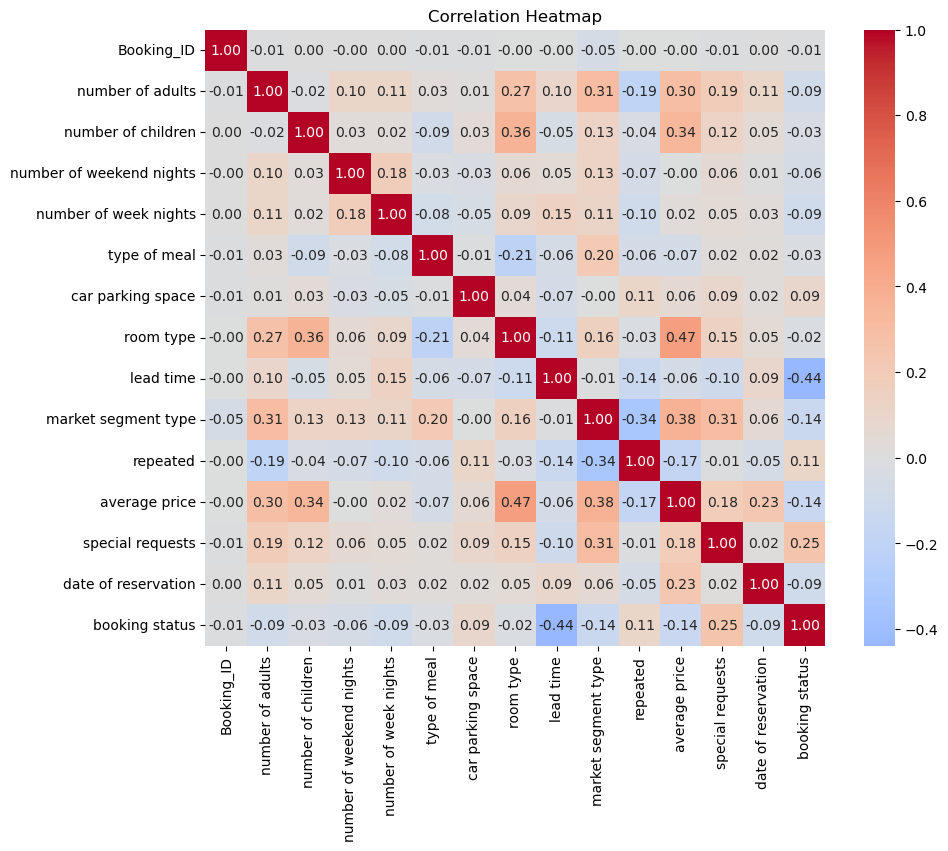

In [9]:
from sklearn.preprocessing import LabelEncoder

data_encoded = df.copy()
le = LabelEncoder()

categorical_cols = data_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    try:
        data_encoded[col] = le.fit_transform(data_encoded[col])
    except:
        print(f"Column {col} has too many unique categories to encode directly.")

corr_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',center=0)
plt.title('Correlation Heatmap')
plt.show()



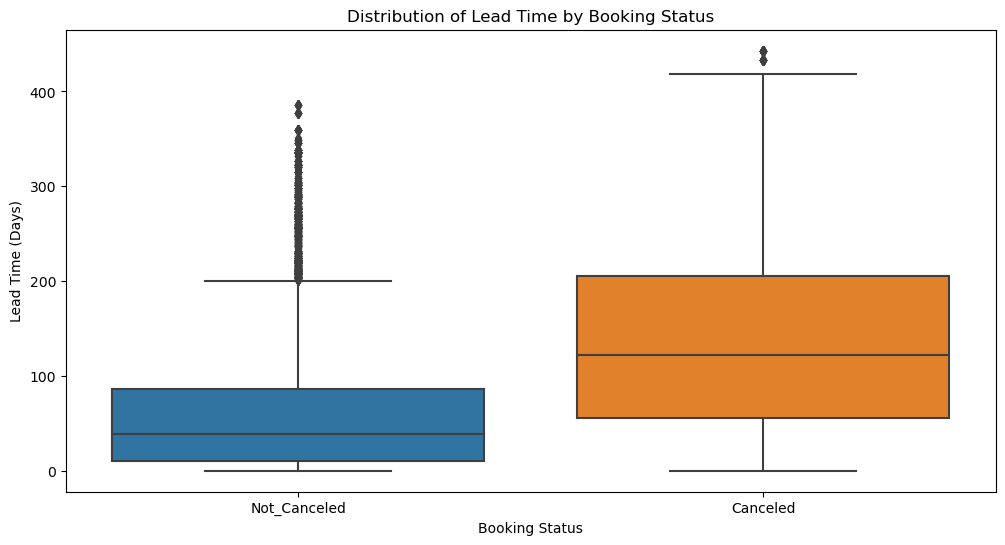

In [11]:
df['booking_status_bin'] = df['booking status'].apply(lambda x: 1 if x == 'Canceled' else 0)

plt.figure(figsize=(12, 6))
sns.boxplot(x='booking status', y='lead time', data=df)
plt.title('Distribution of Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (Days)')
plt.show()


In [12]:
from scipy.stats import ttest_ind

lead_time_canceled = df[df['booking status'] == 'Canceled']['lead time']
lead_time_not_canceled = df[df['booking status'] == 'Not_Canceled']['lead time']

# t-test&p-value
t_stat, p_value = ttest_ind(lead_time_canceled, lead_time_not_canceled, equal_var=False)
t_stat, p_value


(80.61607416473964, 0.0)

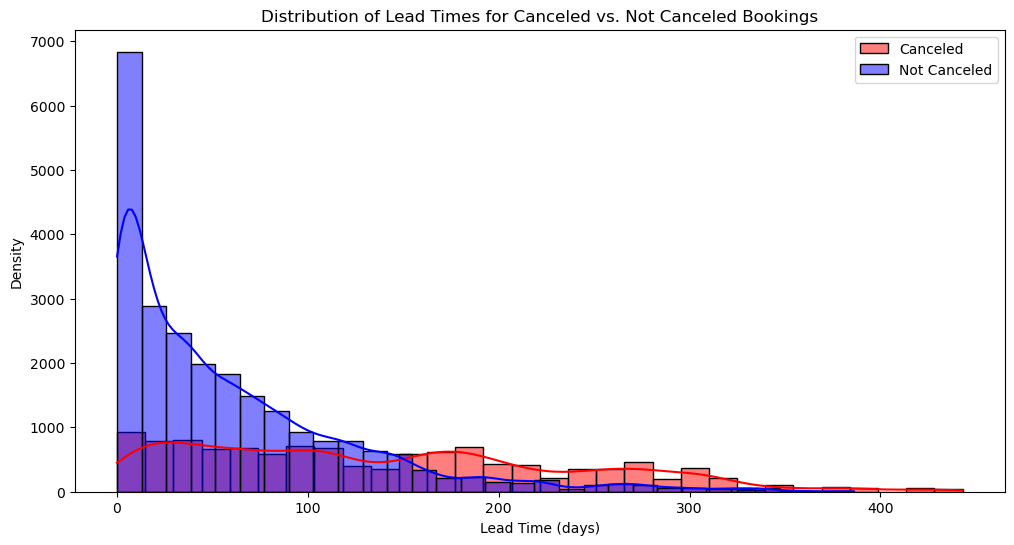

In [13]:
canceled = df[df['booking status'] == 'Canceled']['lead time']
not_canceled = df[df['booking status'] == 'Not_Canceled']['lead time']
plt.figure(figsize=(12, 6))
sns.histplot(canceled, bins=30, kde=True, color='red', label='Canceled')

sns.histplot(not_canceled, bins=30, kde=True, color='blue', label='Not Canceled')
plt.xlabel('Lead Time (days)')
plt.ylabel('Density')
plt.title('Distribution of Lead Times for Canceled vs. Not Canceled Bookings')
plt.legend()

plt.show()


In [14]:
from sklearn.model_selection import train_test_split

target = 'market segment type'
features = data_encoded.drop(columns=[target])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data_encoded[target], test_size=0.2, random_state=42)

# Displaying the shapes of the splits to confirm the operation
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Fit models
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# Accuracy scores
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

(knn_accuracy, svm_accuracy, decision_tree_accuracy, random_forest_accuracy)


(0.6397960589775389, 0.644618988562767, 0.9129116714895963, 0.9381287033209316)